## 1. Introduction: This Notebook is for reading and exploring data provided by Aeternum.Instructions provided by Aetrnum is below.

Regarding the API, here is a rough guide to retrieve data from our sensors.
 
Format for the latest report:
https://api.aeternum.co/api/v2/getSensorData?deviceid=f008d1cc6334&key=q7go1653866vfk4of3el2hedxondks

 

and for historic data (which can be called with json and csv formats): 
https://api.aeternum.co/api/v2/getHistoricData?deviceid=f008d1cc6334&key=q7go1653866vfk4of3el2hedxondks&start=2023-01-01T00:00&end=2023-01-10T00:00&format=json

The following devices are installed around Mossbourne Academy, so you can fill in the deviceid parameter for whichever you want. Please note that the key (q7go1653866vfk4of3el2hedxondks) is the same for all devices
 

PM Sensors:
- LLDC001-P: f008d1cc6334
- LLDC002-P: f008d1cc3a78
- LLDC003-P: f008d1cccdcc

 NO2 sensors:
- LLDC001-NX: f008d1cbd604
- LLDC002-NX: f008d1cbc658

**At the moment, we are only interested in PM sensors.**


Following documentation, we can access the data for last one year as below.
**Note:** If the data is not available or full one year, it will only return for which data is available.

In [1]:
import requests
import json
import pandas as pd

start_date = '2022-02-21T00:00'
end_date = '2023-02-19T00:00'
device_id = 'f008d1cc6334'

url = f'https://api.aeternum.co/api/v2/getHistoricData?deviceid={device_id}&key=q7go1653866vfk4of3el2hedxondks&start={start_date}&end={end_date}&format=json'

response = requests.get(url)
data = json.loads(response.text)

df_aet = pd.DataFrame.from_dict(data)

In [2]:
display(df_aet)

,deviceID,label,timestamp,temperature_celsius,humidity_percent,battery_volt,bin0_count,bin1_count,bin2_count,bin3_count,...,bin12_count,bin13_count,bin14_count,bin15_count,pressure_hpa,pm_1_ug_per_m3,pm_2_5_ug_per_m3,pm_2_5_from,pm_10_ug_per_m3,pm_10_from
0,f008d1cc6334,LLDC001-P (12/40),2022-06-24 11:05:03.261,23.65,51.57,3.75,528,130,14,7,...,0,0,0,0,998,1.269912,2.345453,pm2.5,5.967140,pm10
1,f008d1cc6334,LLDC001-P (12/40),2022-06-24 11:10:00.457,23.34,52.11,3.75,467,138,20,2,...,0,0,0,0,998,1.256053,2.514130,pm2.5,6.033794,pm10
2,f008d1cc6334,LLDC001-P (12/40),2022-06-24 16:42:40.448,25.26,51.84,4.19,541,129,17,6,...,0,0,0,0,996,1.303346,3.114853,pm2.5,7.258034,pm10
3,f008d1cc6334,LLDC001-P (12/40),2022-06-24 16:47:45.965,26.09,46.99,4.19,362,76,19,5,...,1,0,0,0,996,0.886196,2.098284,pm2.5,13.106924,pm10
4,f008d1cc6334,LLDC001-P (12/40),2022-06-24 16:52:51.260,26.10,46.36,4.19,368,84,21,6,...,0,0,0,0,996,0.963969,2.304044,pm2.5,10.410457,pm10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303,f008d1cc6334,LLDC001-P (12/40),2023-02-18 20:34:15.852,10.82,75.02,4.03,398,321,144,77,...,0,0,0,0,1022,3.524731,6.711907,pm2_5_corrected_B,19.033816,pm10_corrected_B
13304,f008d1cc6334,LLDC001-P (12/40),2023-02-18 21:14:15.492,10.85,75.61,4.03,468,350,194,84,...,1,0,0,0,1023,4.211655,7.560664,pm2_5_corrected_B,21.840075,pm10_corrected_B
13305,f008d1cc6334,LLDC001-P (12/40),2023-02-18 21:34:15.341,10.87,75.71,4.03,425,362,196,96,...,0,0,0,0,1023,4.298284,7.759013,pm2_5_corrected_B,20.706828,pm10_corrected_B
13306,f008d1cc6334,LLDC001-P (12/40),2023-02-18 23:14:13.734,10.00,77.11,4.03,453,377,216,108,...,0,0,0,0,1023,4.628215,8.251801,pm2_5_corrected_B,25.634114,pm10_corrected_B


Converting timestamp column to pandas datetime object

In [3]:
# convert to datetime object and create separate columns for date and time.
df_aet['timestamp'] = pd.to_datetime(df_aet['timestamp'])
df_aet['date'] = df_aet['timestamp'].dt.date
df_aet['time'] = df_aet['timestamp'].dt.time

In [4]:
df_aet.columns

Index(['deviceID', 'label', 'timestamp', 'temperature_celsius',
       'humidity_percent', 'battery_volt', 'bin0_count', 'bin1_count',
       'bin2_count', 'bin3_count', 'bin4_count', 'bin5_count', 'bin6_count',
       'bin7_count', 'bin8_count', 'bin9_count', 'bin10_count', 'bin11_count',
       'bin12_count', 'bin13_count', 'bin14_count', 'bin15_count',
       'pressure_hpa', 'pm_1_ug_per_m3', 'pm_2_5_ug_per_m3', 'pm_2_5_from',
       'pm_10_ug_per_m3', 'pm_10_from', 'date', 'time'],
      dtype='object')

We are not interested in bins columns and will drop it for the time being.

In [5]:
df_aet = df_aet[['deviceID', 'label', 'timestamp', 'temperature_celsius', 'humidity_percent',
       'battery_volt', 'pressure_hpa',
       'pm_1_ug_per_m3', 'pm_2_5_ug_per_m3', 'pm_2_5_from', 'pm_10_ug_per_m3',
       'pm_10_from', 'date', 'time']]

In [6]:
# setting timestamp as indux.
df_aet = df_aet.set_index('timestamp')

In [7]:
# df_aet.to_csv('../data/aeternum_data.csv', sep =',', header = True)

The average number of samples per day is approximately 55.


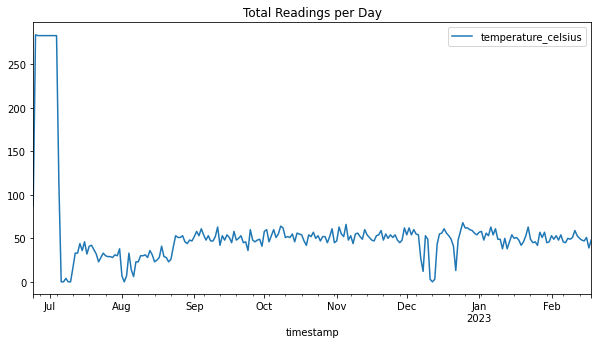

In [8]:
# Resample the data to a daily frequency and count the number of non-missing values
daily_count = df_aet[['temperature_celsius']].resample('D').count()

# Calculate the average number of samples per day
avg_samples_per_day = daily_count.mean()[0]

# Print the result
print("The average number of samples per day is approximately {}.".format(int(avg_samples_per_day)))

# Create a line plot of the daily count data
daily_count.plot(kind='line', figsize=(10, 5), title='Total Readings per Day')

In [9]:
# Find the first and last dates in the index of the DataFrame
first_date = df_aet.index.min().date()
last_date = df_aet.index.max().date()
# Print the results
print("The first date in the time series is {}.".format(first_date))
print("The last date in the time series is {}.".format(last_date))

The first date in the time series is 2022-06-24.
The last date in the time series is 2023-02-18.


## Creating a data Profile using yprofiling module

Dataset is big and hence either we have to filter on monthly basis or resample it to hourly data

In [11]:
# Filter data for August 2022
df_aug_2022 = df_aet.loc[(df_aet.index.month == 8) & (df_aet.index.year == 2022)]

In [12]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_aug_2022, title="Profiling Report Aeternum")
profile.to_widgets()

/home/azureuser/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Resampling to 30 mins

In [13]:
# Resample the data with 30-minute frequency and forward-fill missing values
resampled_df = df_aet.resample('30T').ffill()

In [14]:
display(resampled_df)

,deviceID,label,temperature_celsius,humidity_percent,battery_volt,pressure_hpa,pm_1_ug_per_m3,pm_2_5_ug_per_m3,pm_2_5_from,pm_10_ug_per_m3,pm_10_from,date,time
timestamp,,,,,,,,,,,,,
2022-06-24 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-24 11:30:00,f008d1cc6334,LLDC001-P (12/40),23.34,52.11,3.75,998.0,1.256053,2.514130,pm2.5,6.033794,pm10,2022-06-24,11:10:00.457000
2022-06-24 12:00:00,f008d1cc6334,LLDC001-P (12/40),23.34,52.11,3.75,998.0,1.256053,2.514130,pm2.5,6.033794,pm10,2022-06-24,11:10:00.457000
2022-06-24 12:30:00,f008d1cc6334,LLDC001-P (12/40),23.34,52.11,3.75,998.0,1.256053,2.514130,pm2.5,6.033794,pm10,2022-06-24,11:10:00.457000
2022-06-24 13:00:00,f008d1cc6334,LLDC001-P (12/40),23.34,52.11,3.75,998.0,1.256053,2.514130,pm2.5,6.033794,pm10,2022-06-24,11:10:00.457000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 21:30:00,f008d1cc6334,LLDC001-P (12/40),10.85,75.61,4.03,1023.0,4.211655,7.560664,pm2_5_corrected_B,21.840075,pm10_corrected_B,2023-02-18,21:14:15.492000
2023-02-18 22:00:00,f008d1cc6334,LLDC001-P (12/40),10.87,75.71,4.03,1023.0,4.298284,7.759013,pm2_5_corrected_B,20.706828,pm10_corrected_B,2023-02-18,21:34:15.341000
2023-02-18 22:30:00,f008d1cc6334,LLDC001-P (12/40),10.87,75.71,4.03,1023.0,4.298284,7.759013,pm2_5_corrected_B,20.706828,pm10_corrected_B,2023-02-18,21:34:15.341000


## Next Steps

1. Read the PV data and combine for the available dates.
2. find correlation analysis
3. Visualise as discussed today

### Looking at any particular day

In [ ]:
from datetime import date
filter_date = date(2023, 2, 17)
filter_df = df_aet.loc[df_aet['date']==filter_date]

In [ ]:
len(filter_df)

In [ ]:
display(filter_df)

In [ ]:
# display(df_aet_hourly)

In [ ]:
df_pvc = pd.read_csv('../data/pvc_sensors.csv', sep=',', header='infer')
df_pvc = df_pvc.rename(columns={'Date (UTC)':'datetime', '1200061435370 (kWh)': 'sensor A', '1200061695248 (kWh)':'sensor B'})
df_pvc['datetime'] = pd.to_datetime(df_pvc['datetime'])
df_pvc['date'] = df_pvc['datetime'].dt.date
df_pvc['time'] = df_pvc['datetime'].dt.time